## Import needed packages

In [1]:
from __future__ import print_function
import numpy as np
import keras
from keras.models import load_model
from keras.datasets import mnist
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
import glob
import pydot

IMG_SIZE = 96
#LABEL_SIZE = 128
#epochs = 60

training_data_path = r'/floyd/input/architectural_style_classification'
num_classes = 6
model_name = 'keras_cnn_architecture.h5'
model_path_to_save = '.'

Using TensorFlow backend.


## Import images

In [3]:
pkg_names = os.listdir(training_data_path)
m_tr_pkgs = len(pkg_names)
target = []
img_buff = np.zeros((300, IMG_SIZE, IMG_SIZE, 3))
for m in range(m_tr_pkgs):
    img_names = os.listdir(training_data_path + '/' + pkg_names[m])
    m_tr_imgs = len(os.listdir(training_data_path + '/' + pkg_names[m]))
    for i in range(m_tr_imgs):
        img_file_path = os.path.join(training_data_path + '/' + pkg_names[m] + '/' + img_names[i])
        img = cv2.imread(img_file_path)
        img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        img_buff[50*m+i, :, :, :] = img/255.
        this_label = pkg_names[m]
        target.append(this_label)

        if np.mod(i, 5) == 1:
            print('reading images: ' + str(i) + ' / ' + str(m_tr_imgs))

reading images: 1 / 50
reading images: 6 / 50
reading images: 11 / 50
reading images: 16 / 50
reading images: 21 / 50
reading images: 26 / 50
reading images: 31 / 50
reading images: 36 / 50
reading images: 41 / 50
reading images: 46 / 50
reading images: 1 / 50
reading images: 6 / 50
reading images: 11 / 50
reading images: 16 / 50
reading images: 21 / 50
reading images: 26 / 50
reading images: 31 / 50
reading images: 36 / 50
reading images: 41 / 50
reading images: 46 / 50
reading images: 1 / 50
reading images: 6 / 50
reading images: 11 / 50
reading images: 16 / 50
reading images: 21 / 50
reading images: 26 / 50
reading images: 31 / 50
reading images: 36 / 50
reading images: 41 / 50
reading images: 46 / 50
reading images: 1 / 50
reading images: 6 / 50
reading images: 11 / 50
reading images: 16 / 50
reading images: 21 / 50
reading images: 26 / 50
reading images: 31 / 50
reading images: 36 / 50
reading images: 41 / 50
reading images: 46 / 50
reading images: 1 / 50
reading images: 6 / 50
re

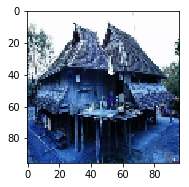

In [54]:
for i in range(49):
    plt.subplot(1,2,1)
    plt.imshow(img_buff[i, :])

In [56]:
img_buff[0].shape

(96, 96, 3)

In [57]:
target[49]

'Chuan'

## Split data into train and test sets

In [4]:
classes = ['Chuan', 'Hui', 'Jin', 'Jing', 'Min', 'Su']
for i in range(len(target)):
    target[i] = classes.index(target[i])

In [5]:
# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(img_buff, target, test_size=0.2)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build the model

In [13]:
x_train.shape

(240, 256, 256, 3)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
model.load_weights('best_model.weights')

## Model training

In [41]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [65]:
from keras.callbacks import Callback

def evaluate(): # 评测函数
    pred = model.predict(x_test)
    return np.mean(pred.argmax(axis=1) == y_test) # 爱算啥就算啥


# 定义Callback器，计算验证集的acc，并保存最优模型
class Evaluate(Callback):

    def __init__(self):
        self.accs = []
        self.highest = 0.

    def on_epoch_end(self, epoch, logs=None):
        acc = evaluate()
        self.accs.append(acc)
        if acc >= self.highest: # 保存最优模型权重
            self.highest = acc
            model.save_weights('best_model.weights')



evaluator = Evaluate()

In [ ]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=40),
                        epochs=30,
                        validation_data=(x_test, y_test),
                        steps_per_epoch=60,
                        callbacks=[evaluator])
score = model.evaluate(x_test, y_test, batch_size=30)

Epoch 1/30
60/60 [==============================] - 6s 105ms/step - loss: 0.9642 - acc: 0.6412 - val_loss: 1.0495 - val_acc: 0.6333
Epoch 2/30
 2/60 [>.............................] - ETA: 3s - loss: 0.9240 - acc: 0.6875

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


60/60 [==============================] - 6s 99ms/step - loss: 0.9413 - acc: 0.6546 - val_loss: 0.8992 - val_acc: 0.7000
Epoch 3/30
60/60 [==============================] - 7s 108ms/step - loss: 0.9246 - acc: 0.6725 - val_loss: 0.8175 - val_acc: 0.7333
Epoch 4/30
60/60 [==============================] - 6s 103ms/step - loss: 0.8968 - acc: 0.6704 - val_loss: 0.8664 - val_acc: 0.7167
Epoch 5/30
60/60 [==============================] - 6s 102ms/step - loss: 0.8696 - acc: 0.6933 - val_loss: 0.8912 - val_acc: 0.7500
Epoch 6/30
60/60 [==============================] - 6s 108ms/step - loss: 0.8594 - acc: 0.6937 - val_loss: 0.8544 - val_acc: 0.7000
Epoch 7/30
60/60 [==============================] - 6s 104ms/step - loss: 0.8399 - acc: 0.7025 - val_loss: 0.8629 - val_acc: 0.7500
Epoch 8/30
60/60 [==============================] - 6s 105ms/step - loss: 0.8214 - acc: 0.7025 - val_loss: 1.0713 - val_acc: 0.5667
Epoch 9/30
60/60 [==============================] - 7s 110ms/step - loss: 0.8237 - acc: 

In [11]:
score = model.evaluate(x_test, y_test, batch_size=30)
score

60/60 [==============================] - 1s 12ms/step


[0.3096892386674881, 0.9166666567325592]

In [12]:
model.save("architecture_keras_cnn.h5")